In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
for i in df.columns:
    print(i)

step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe().astype(int)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


In [ ]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

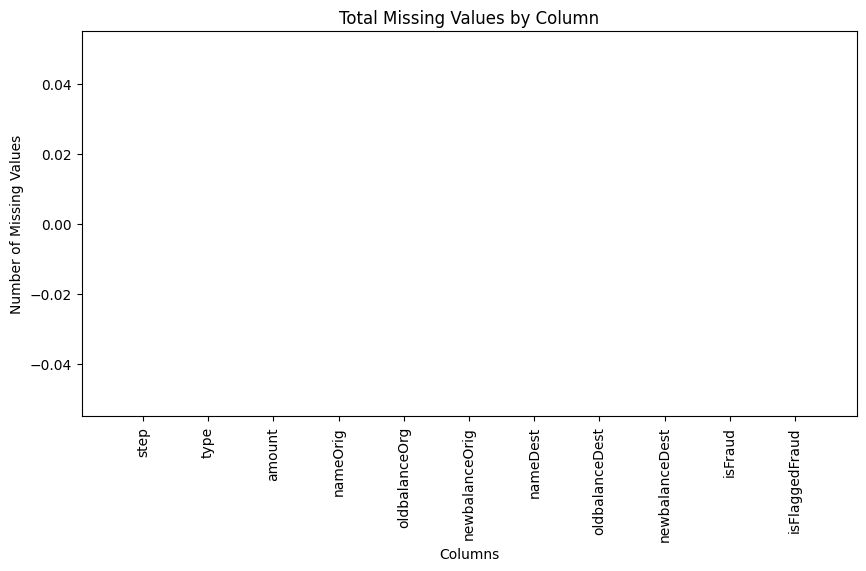

In [ ]:
import matplotlib.pyplot as plt

missing_data = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(missing_data.index, missing_data, color='skyblue')
plt.title("Total Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.show()


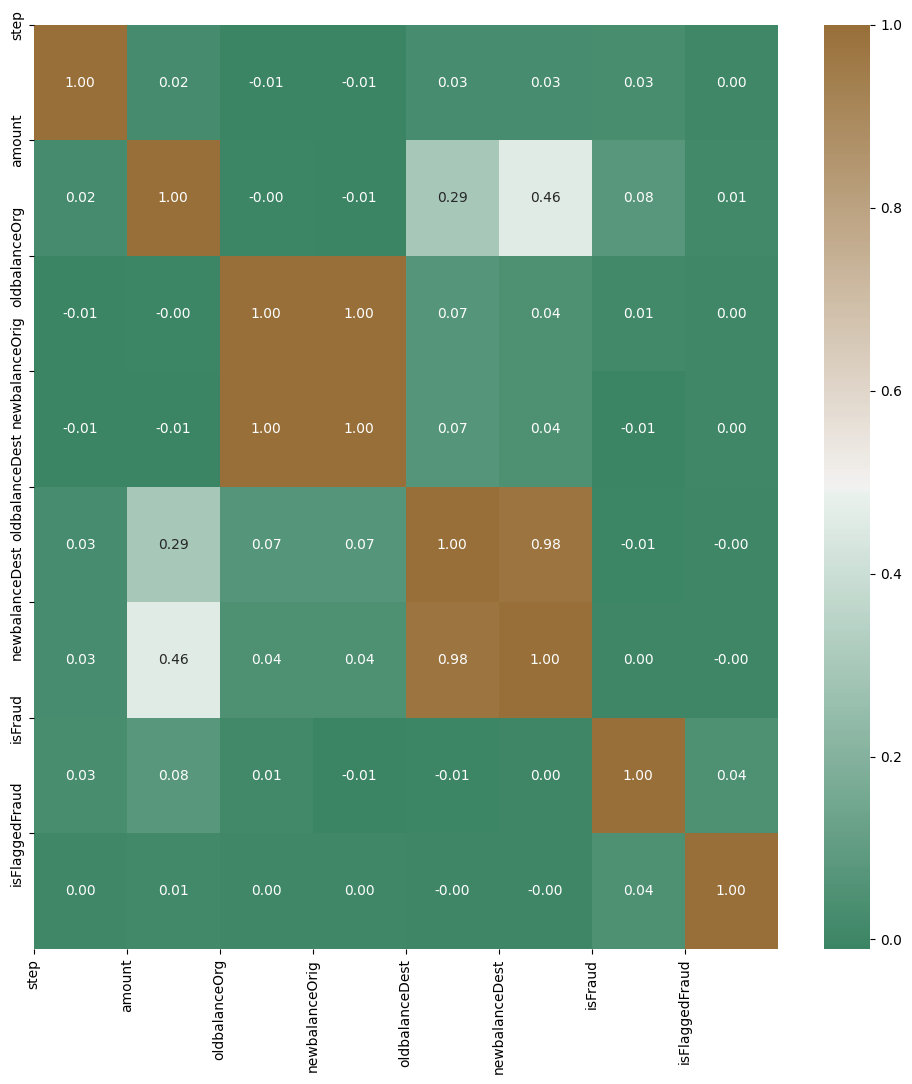

In [ ]:
df_numeric = df.select_dtypes(include='number')  # Select only numeric columns
corr = df_numeric.corr()

fig, ax = plt.subplots(figsize=(12, 12))
colormap = sns.diverging_palette(150,50, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
df_numeric = df.select_dtypes(include='number')  # Select only numeric columns
corr_matrix  = df_numeric.corr()

# Flatten the correlation matrix to a Series and sort it
correlation_series = corr_matrix.unstack().sort_values(ascending=False)

# Filter out self-correlations and duplicates
correlation_series = correlation_series[correlation_series != 1.0]

# Print the top N most correlated pairs
n_most_correlated = 10  # You can adjust this number
most_correlated_pairs = correlation_series.head(n_most_correlated)

# Print the result
print("Top", n_most_correlated, "most correlated pairs:")
print(most_correlated_pairs)


Top 10 most correlated pairs:
oldbalanceOrg   newbalanceOrig    0.998803
newbalanceOrig  oldbalanceOrg     0.998803
newbalanceDest  oldbalanceDest    0.976569
oldbalanceDest  newbalanceDest    0.976569
newbalanceDest  amount            0.459304
amount          newbalanceDest    0.459304
                oldbalanceDest    0.294137
oldbalanceDest  amount            0.294137
amount          isFraud           0.076688
isFraud         amount            0.076688
dtype: float64


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

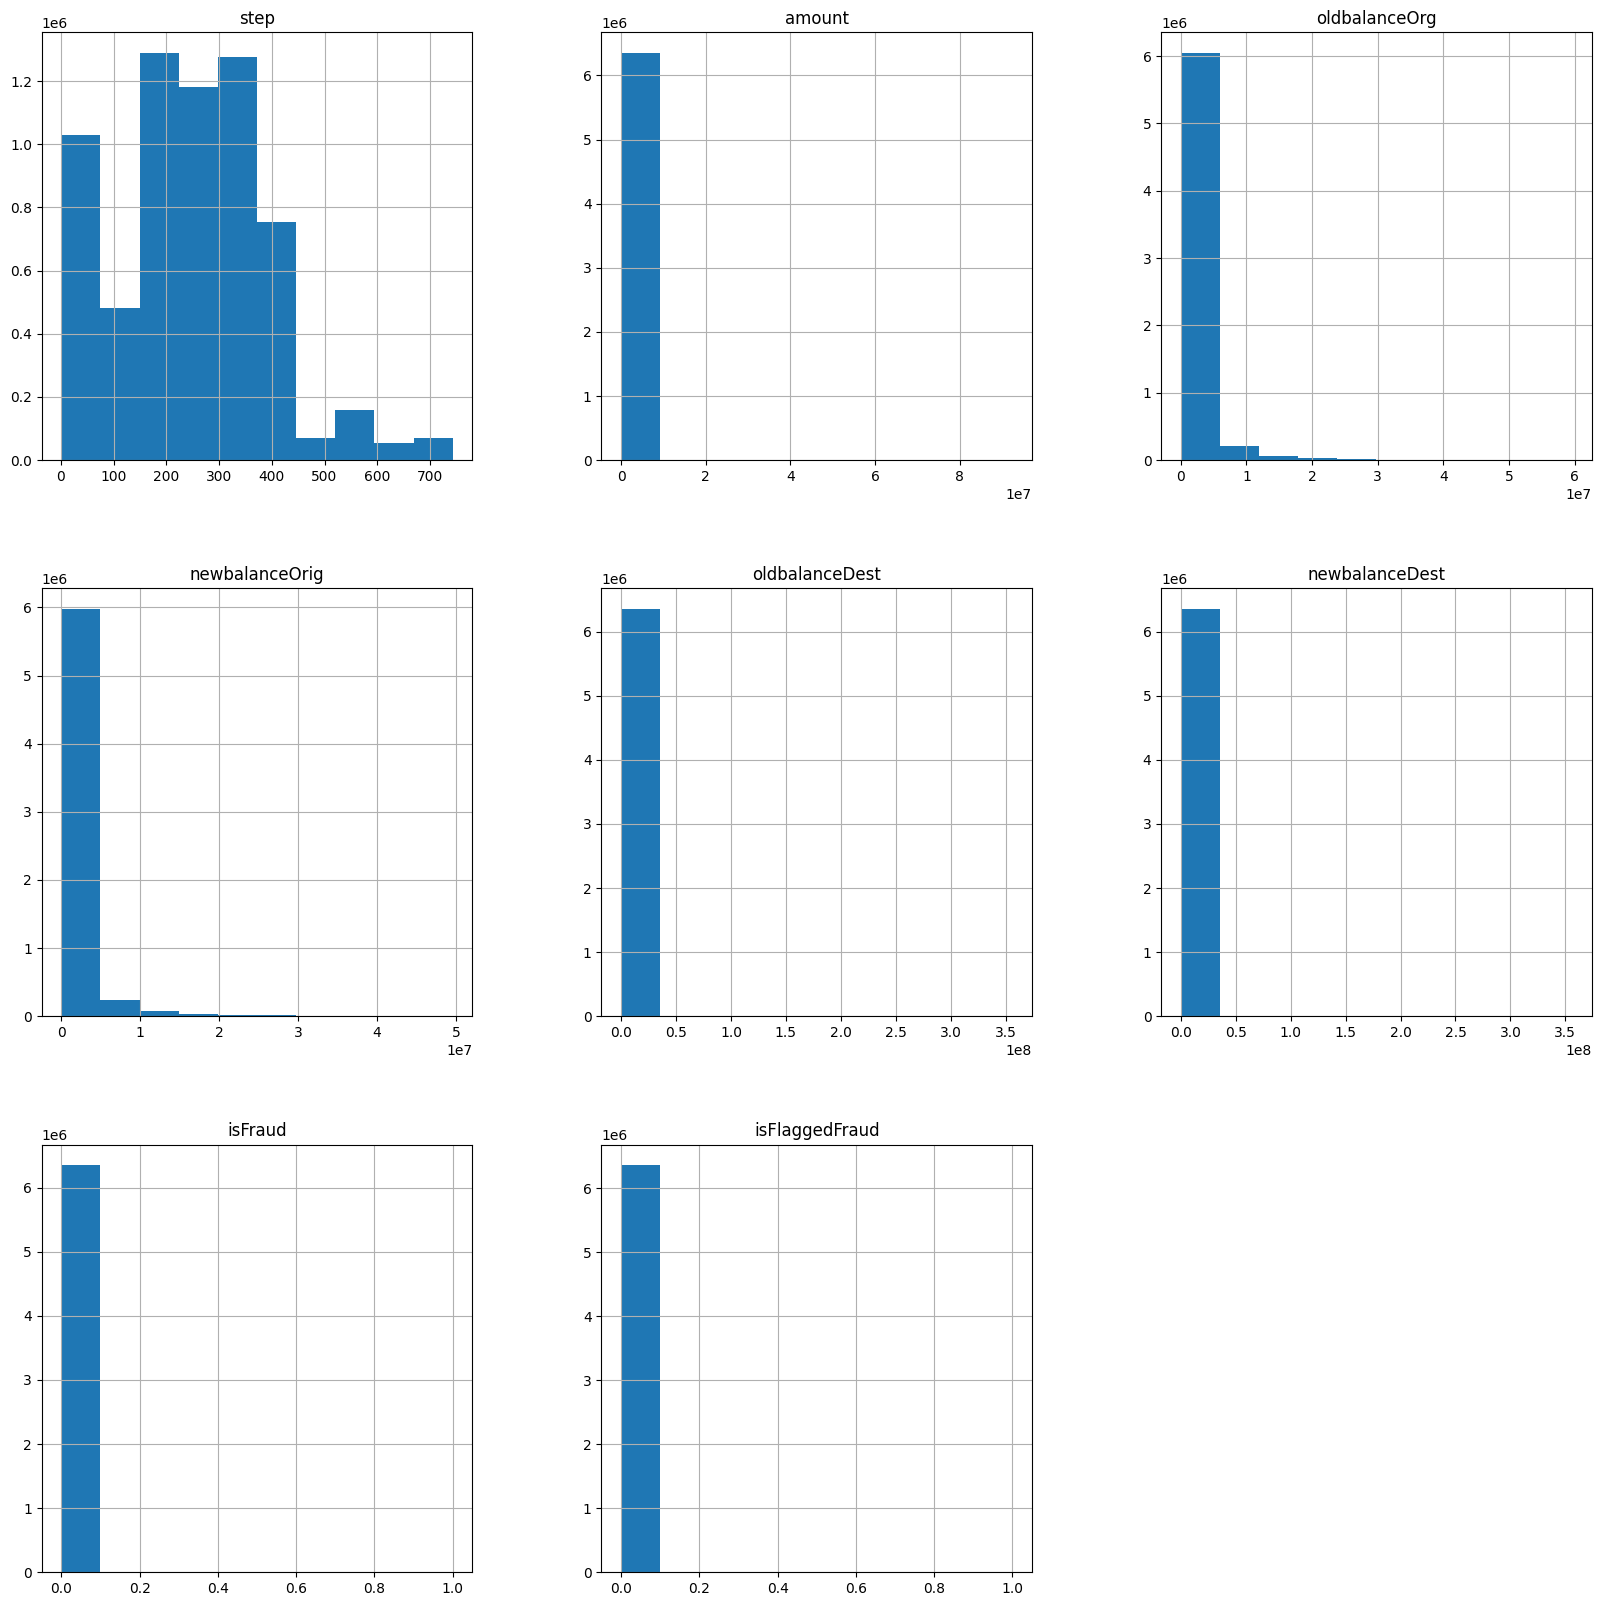

In [ ]:
df.hist(figsize=(20,20))


# Univariate Analysis

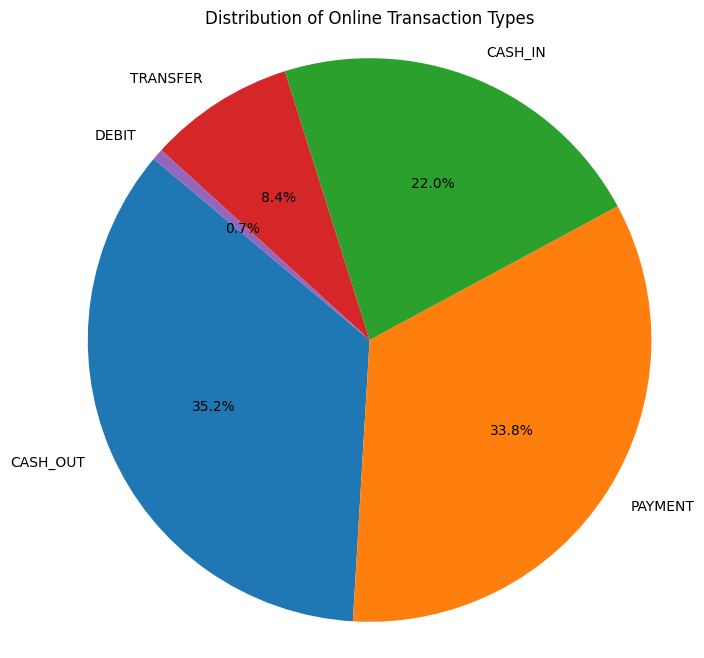

In [ ]:

# Count the occurrences of each online transaction type
transaction_type_counts = df['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(transaction_type_counts, labels=transaction_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Online Transaction Types")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


The chart reveals that "cash_out" and "payment" are the predominant types of online transactions frequently utilized by customers.


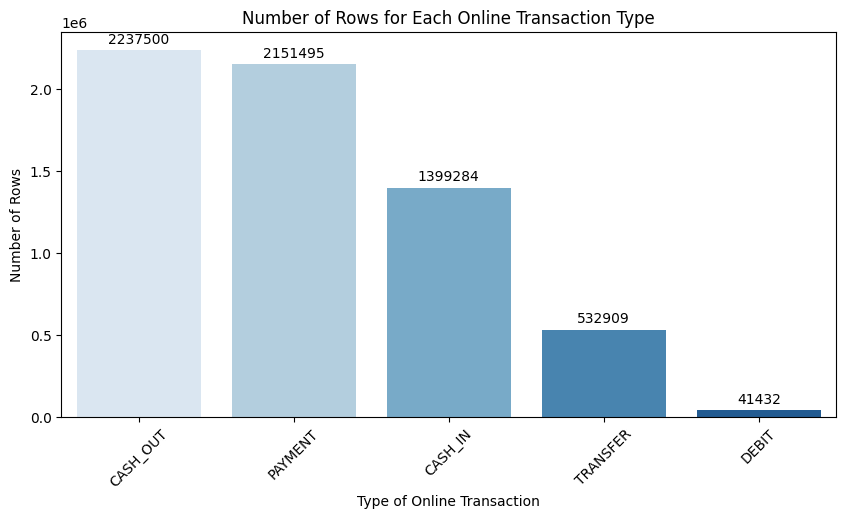

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each online transaction type
transaction_type_counts = df['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts, palette="Blues")
plt.title("Number of Rows for Each Online Transaction Type")
plt.xlabel("Type of Online Transaction")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add exact numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


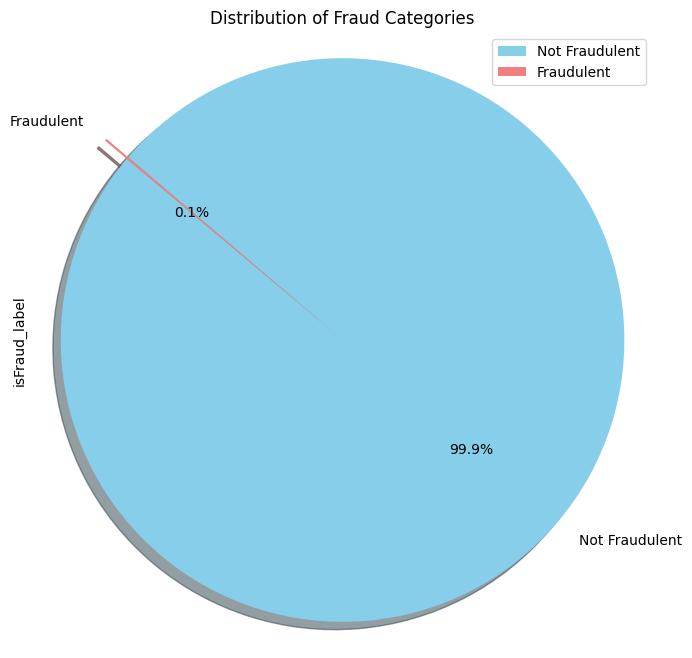

In [ ]:

# Define a function to categorize 'isFraud' values
def categorize_fraud(x):
    return "Fraudulent" if x == 1 else "Not Fraudulent"

# Create a new column for the categories
df["isFraud_label"] = df["isFraud"].apply(categorize_fraud)

# Create a pie chart visualization
plt.figure(figsize=(8, 8))
plt.title("Distribution of Fraud Categories")

# Define colors and explode a slice for emphasis
colors = ["skyblue", "lightcoral"]
explode = (0.1, 0)

# Create the pie chart
fraud_pie = df["isFraud_label"].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)

# Add a legend
plt.legend(labels=df["isFraud_label"].value_counts().index, loc="upper right")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()

In [ ]:
 df["isFraud_label"].value_counts()

Not Fraudulent    6354407
Fraudulent           8213
Name: isFraud_label, dtype: int64

<Axes: xlabel='amount', ylabel='Count'>

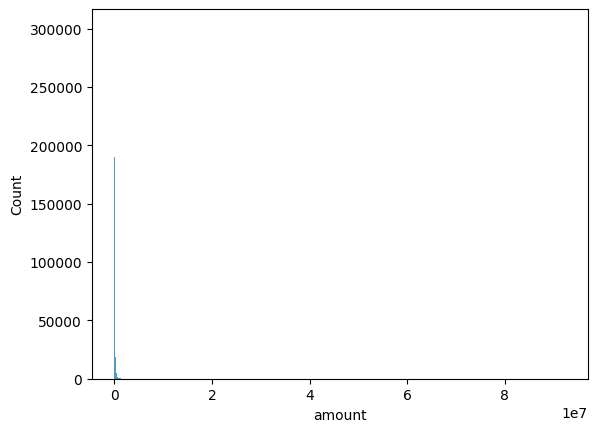

In [ ]:
sns.histplot(x= "amount", data =df)


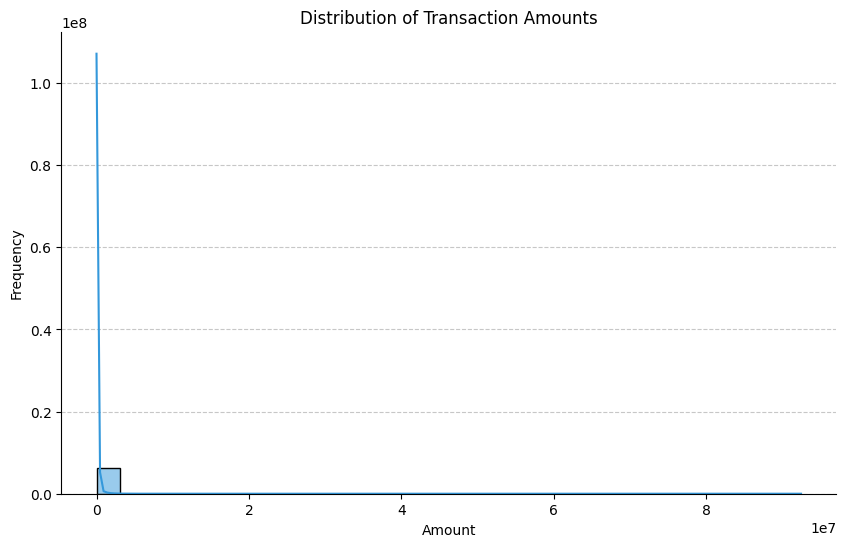

In [ ]:

# Set a custom color palette
custom_palette = ["#3498db"]

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x="amount", bins=30, color=custom_palette[0], kde=True)

# Add titles and labels
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove right and top spines
sns.despine()

plt.show()


<Axes: xlabel='amount', ylabel='Density'>

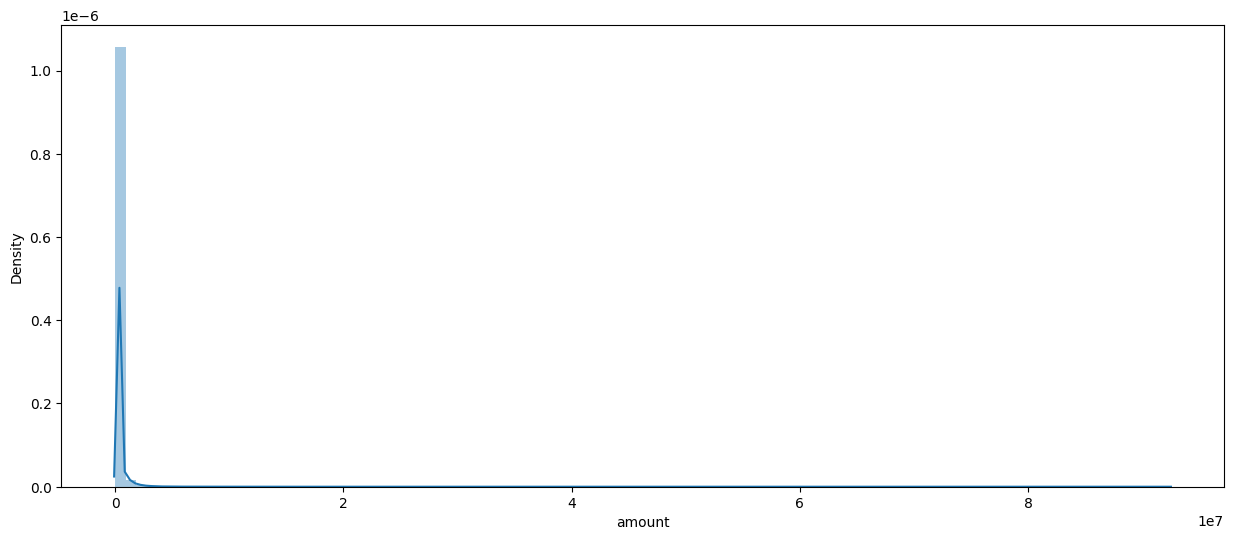

In [ ]:
#To disable warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization for step column

plt.figure(figsize=(15,6))
sns.distplot(df['amount'],bins=100)

# Bivariate Analysis


<Axes: xlabel='type', ylabel='amount'>

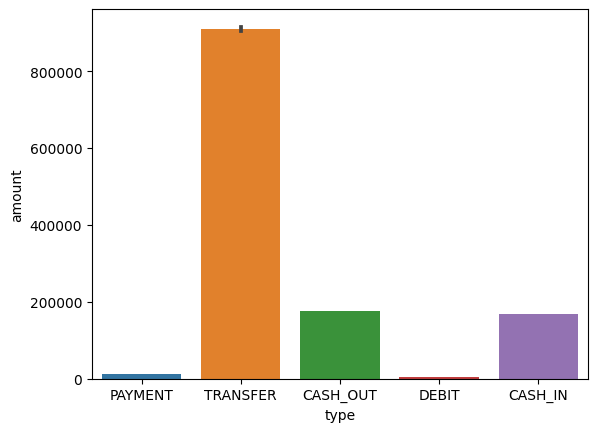

In [ ]:

sns.barplot(x='type',y='amount',data=df)

Text(0, 0.5, 'isFraud_label')

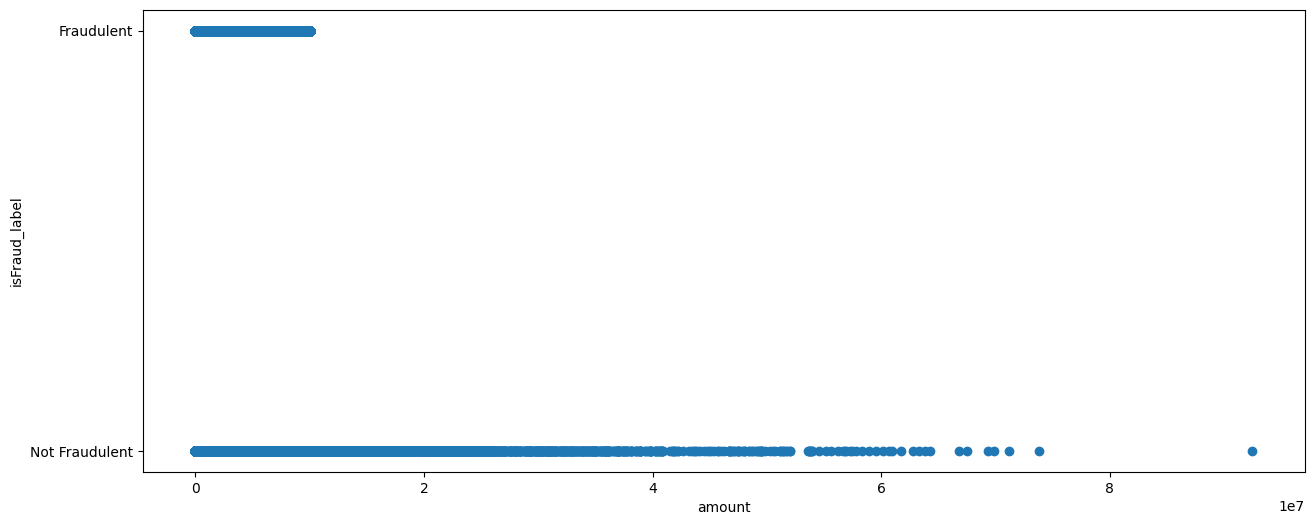

In [ ]:

plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='isFraud_label',data=df)
plt.xlabel('amount')
plt.ylabel('isFraud_label')

Text(0, 0.5, 'fraud_transaction_label')

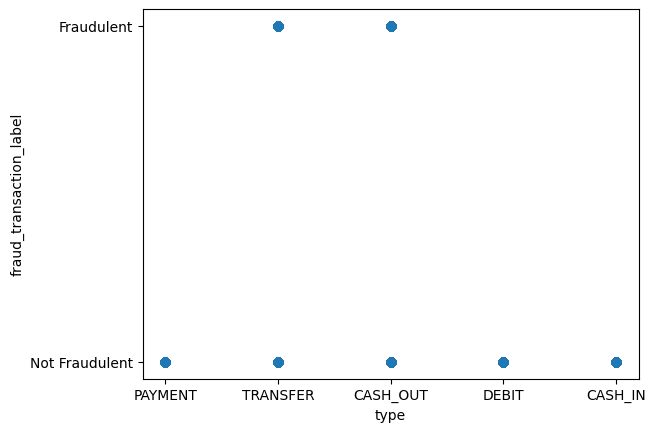

In [ ]:
# Visualization between type and isfraud_label

plt.scatter(x='type',y='isFraud_label',data=df)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')

<Figure size 1200x600 with 0 Axes>

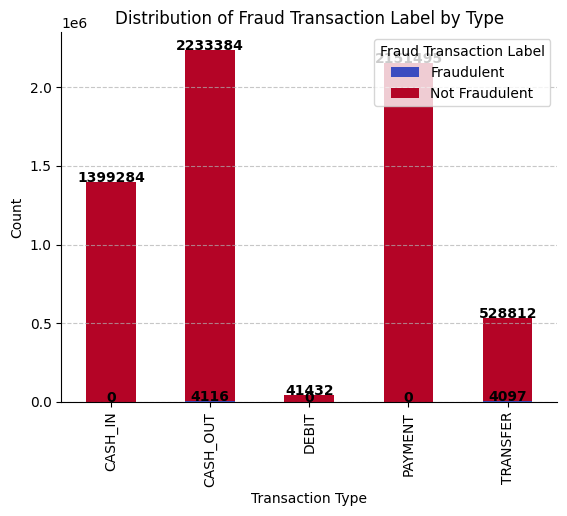

In [ ]:

# Create a cross-tabulation of 'type' and 'fraud_transaction_label'
cross_tab = pd.crosstab(df['type'], df['isFraud_label'])

# Visualization between type and fraud_transaction_label using a grouped bar plot
plt.figure(figsize=(12, 6))
ax = cross_tab.plot(kind='bar', stacked=True, colormap='coolwarm')

# Add titles and labels
plt.title("Distribution of Fraud Transaction Label by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove right and top spines
sns.despine()

plt.legend(title='Fraud Transaction Label')

# Annotate each segment with count values
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height), ha='center', fontsize=10, fontweight='bold')

plt.show()


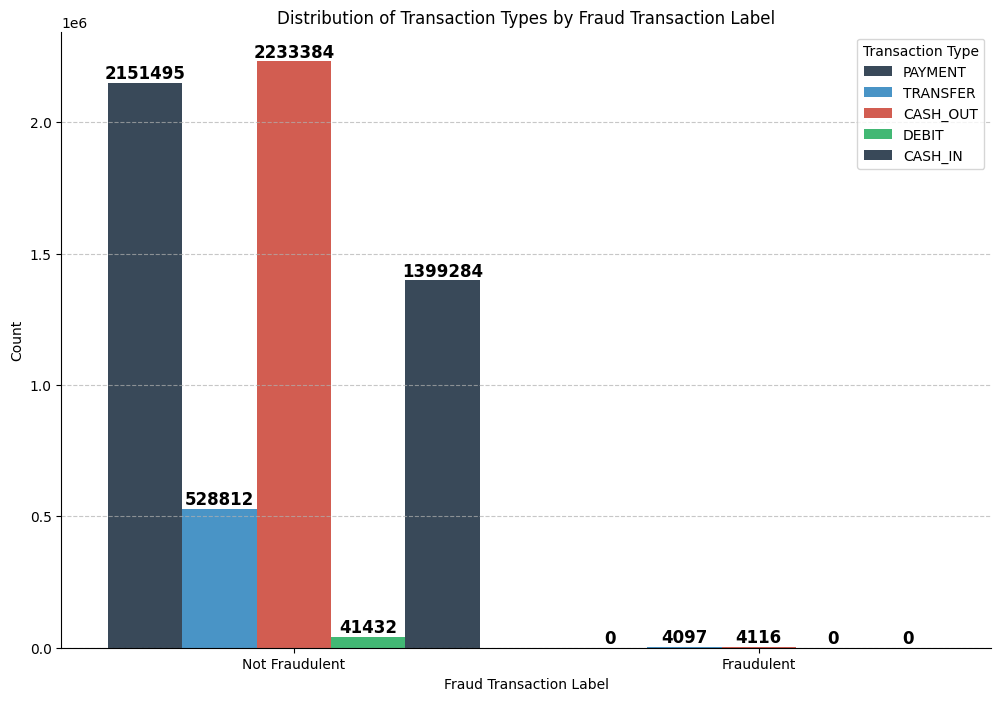

In [ ]:

# Define a custom color palette
custom_palette = ['#34495e', '#3498db', '#e74c3c', '#2ecc71']

# Create a count plot with hue
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='isFraud_label', hue='type', palette=custom_palette)

# Add titles and labels
plt.title("Distribution of Transaction Types by Fraud Transaction Label")
plt.xlabel("Fraud Transaction Label")
plt.ylabel("Count")

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove right and top spines
sns.despine()

# Adjust the legend position
plt.legend(title='Transaction Type', loc="upper right")

# Annotate each bar with count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()


All of the above graphs suggest that fraudulent transactions primarily consist of 'transfer' and 'cash out' transaction types.

# Multivariate Analysis

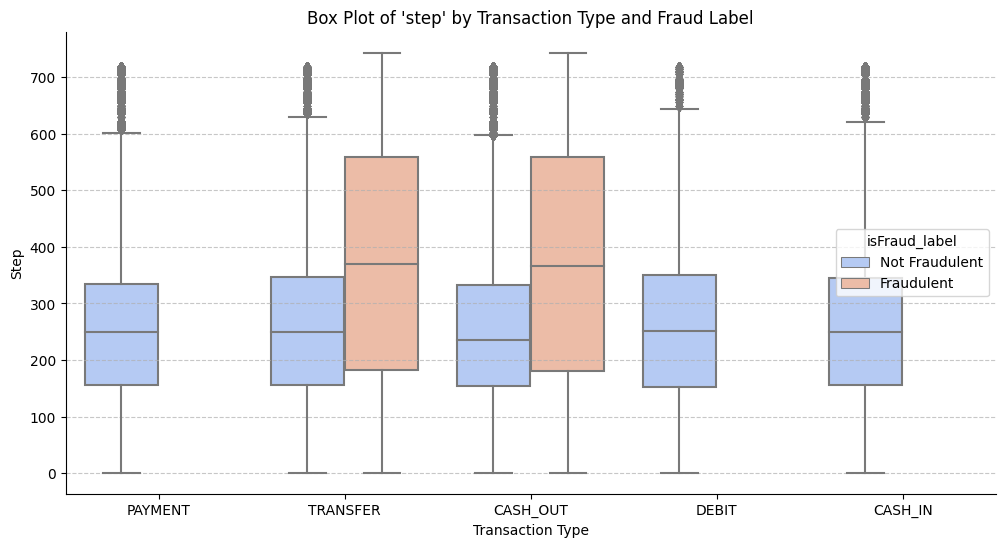

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="type", y="step", hue="isFraud_label", data=df, palette="coolwarm")

# Add titles and labels
plt.title("Box Plot of 'step' by Transaction Type and Fraud Label")
plt.xlabel("Transaction Type")
plt.ylabel("Step")

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove right and top spines
sns.despine()

plt.show()


# Outliers

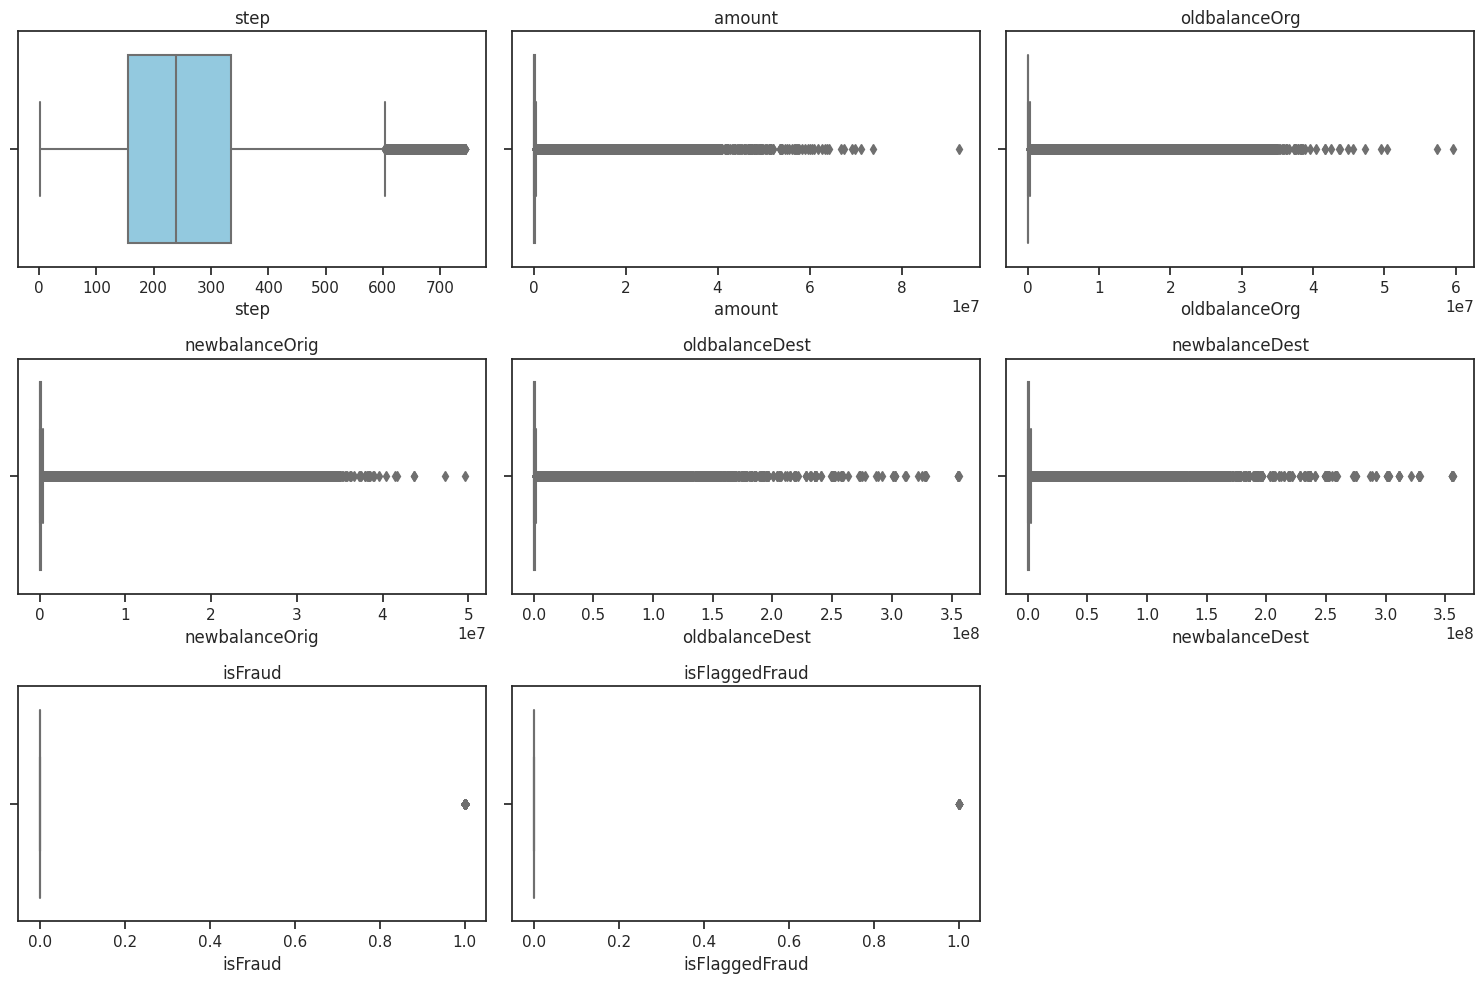

In [ ]:

# Define the columns you want to examine for outliers (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns

# Create a box plot for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'{column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [ ]:
# Define a function to identify and print outliers for a given column
def identify_outliers(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    return outliers

# Loop through numeric columns and print detailed information
for column in numeric_columns:
    outliers = identify_outliers(df[column])

    # Calculate additional statistics
    data_min = df[column].min()
    data_max = df[column].max()
    data_mean = df[column].mean()
    data_median = df[column].median()
    data_std = df[column].std()
    data_q1 = df[column].quantile(0.25)
    data_q3 = df[column].quantile(0.75)

    # Calculate the full range between Q1 and Q3
    range_q1_q3 = f"{data_q1} to {data_q3}"

    print(f"Column: {column}")
    print(f"Minimum Value: {data_min}")
    print(f"Maximum Value: {data_max}")
    print(f"Mean: {data_mean}")
    print(f"Median: {data_median}")
    print(f"Standard Deviation: {data_std}")
    print(f"Q1 (25th percentile): {data_q1}")
    print(f"Q3 (75th percentile): {data_q3}")
    print(f"Range (Q1 to Q3): {range_q1_q3}")
    print(f"Number of Outliers: {len(outliers)}")
    print("\n")


Column: step
Minimum Value: 1
Maximum Value: 743
Mean: 243.39724563151657
Median: 239.0
Standard Deviation: 142.33197104912992
Q1 (25th percentile): 156.0
Q3 (75th percentile): 335.0
Range (Q1 to Q3): 156.0 to 335.0
Number of Outliers: 102688


Column: amount
Minimum Value: 0.0
Maximum Value: 92445516.64
Mean: 179861.90354913071
Median: 74871.94
Standard Deviation: 603858.2314629358
Q1 (25th percentile): 13389.57
Q3 (75th percentile): 208721.4775
Range (Q1 to Q3): 13389.57 to 208721.4775
Number of Outliers: 338078


Column: oldbalanceOrg
Minimum Value: 0.0
Maximum Value: 59585040.37
Mean: 833883.1040744866
Median: 14208.0
Standard Deviation: 2888242.6730375555
Q1 (25th percentile): 0.0
Q3 (75th percentile): 107315.175
Range (Q1 to Q3): 0.0 to 107315.175
Number of Outliers: 1112507


Column: newbalanceOrig
Minimum Value: 0.0
Maximum Value: 49585040.37
Mean: 855113.6685785869
Median: 0.0
Standard Deviation: 2924048.5029542665
Q1 (25th percentile): 0.0
Q3 (75th percentile): 144258.41
Rang

In [ ]:
# Define a function to identify and remove outlier rows for a given column
def remove_outlier_rows(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

# Create a copy of the original DataFrame without outlier rows
filtered_df = df.copy()

# Loop through numeric columns and remove outlier rows
for column in numeric_columns:
    filtered_df = filtered_df[(filtered_df[column] >= remove_outlier_rows(filtered_df[column]).min()) &
                              (filtered_df[column] <= remove_outlier_rows(filtered_df[column]).max())]

# The filtered_df DataFrame now contains rows without outliers


In [ ]:
filtered_df.shape, df.shape

((3196840, 12), (6362620, 12))